## *Customer Segmentation using KMeans and DBSCAN*
#### We directly load the dataset from a GitHub raw link:

In [9]:
import pandas as pd
from sklearn.cluster import DBSCAN
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## *Feature Selection and Scaling*
#### We use Annual Income and Spending Score as features.                                                                                                                 Scaling is required because clustering algorithms are distance-based.

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## KMeans Clustering with Elbow Method

#### The Elbow Method helps find the optimal number of clusters (k) by plotting inertia (sum of squared distances) against k.

In [11]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_) 

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

## *Visualization*

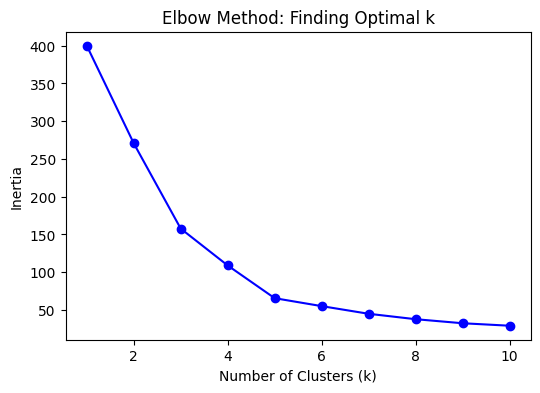

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method: Finding Optimal k')
plt.show()

## *Cluster Analysis*

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


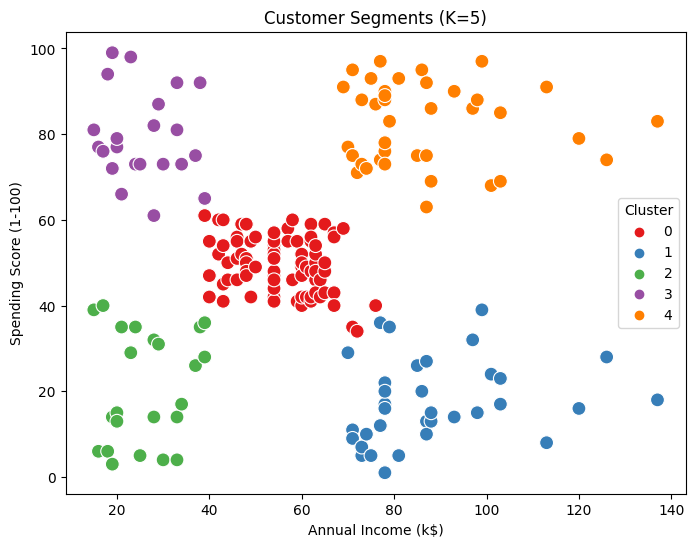

In [13]:
#Let’s assume elbow suggests k = 5
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100
)
plt.title(f'Customer Segments (K={optimal_k})')
plt.show()

## *Analyze average income and spending by cluster*

In [14]:
print("Average values per cluster:")
print(df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

Average values per cluster:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 88.200000               17.114286
2                 26.304348               20.913043
3                 25.727273               79.363636
4                 86.538462               82.128205


## *DBSCAN Clustering*

#### Unlike KMeans, DBSCAN does not require the number of clusters in advance. It groups together points that are close to each other based on density.

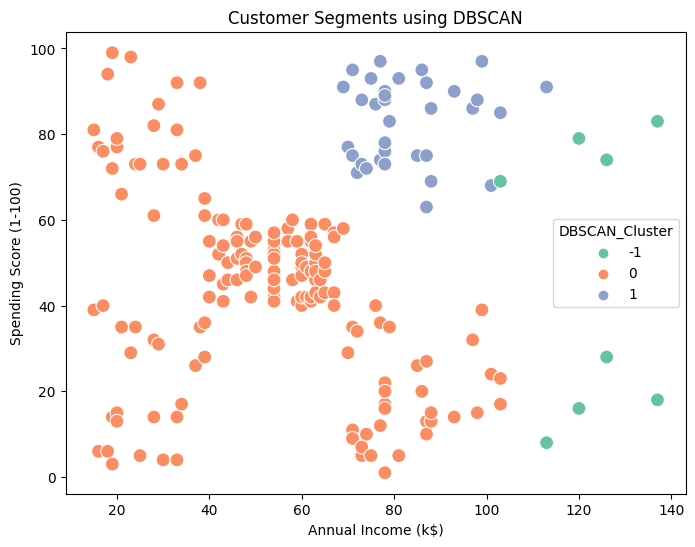

In [15]:
dbscan = DBSCAN(eps=0.5, min_samples=5)   # parameters you can tune
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='DBSCAN_Cluster',
    palette='Set2',
    data=df,
    s=100
)
plt.title("Customer Segments using DBSCAN")
plt.show()




### Analyze average income and spending score per DBSCAN cluster

In [16]:
print(df.groupby('DBSCAN_Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean())

                Annual Income (k$)  Spending Score (1-100)
DBSCAN_Cluster                                            
-1                      122.750000               46.875000
 0                       52.490446               43.101911
 1                       82.542857               82.800000


## *Conclusion*

## KMeans

#### *Divided customers into 5 distinct groups (e.g., low income–low spenders, high income–high spenders, etc.).Works well when the number of clusters is known and clusters are spherical.*

## *DBSCAN*

#### Automatically detects clusters based on density.

#### Can mark some points as noise (-1).

#### More flexible than KMeans but sensitive to parameters eps and min_samples.

#### 👉 In this dataset, KMeans (k=5) gives well-defined segments, while DBSCAN may classify some customers as outliers depending on the parameters.